In [1]:
import pkg_resources
try:
    pkg_resources.require("networkx==2.1")
    import networkx as nx
except:
    import sys
    !{sys.executable} -m pip install -I networkx==2.1
    pkg_resources.require("networkx==2.1")
    import networkx as nx

In [2]:
from prm import ProbabilisticRoadMap
import numpy as np
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['figure.figsize'] = 20, 20

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [4]:
prm = ProbabilisticRoadMap(data, zmin=3)

Collision checking took 0.08755707740783691 seconds ...
Kept 1000 of 1000 points
Average node coverage area: 846.4
Grid center: (144.7611, 15.768500000000017)
Sample point center: ([144.14477188  14.37188363 113.82591277])
Recommended search radius: 350.11554646959604
Graph creation took 2.7046728134155273 seconds ...
Graph has 1634 edges.


In [5]:
start = list(prm._graph.nodes)[10]
k = np.random.randint(len(prm._graph.nodes))
print(k, len(prm._graph.nodes))
goal = list(prm._graph.nodes)[k]

print("start: {}".format(start))
print("goal:  {}".format(goal))

105 854
start: (-233.4810875, 400.4690029721079, 125.75007191840004)
goal:  (-193.9498375, -402.16474188385916, 2.0504114704000003)


In [6]:
path = prm.plan_path(start, goal)

Found a path.
20 [(-233.4810875, 400.4690029721079, 125.75007191840004), (-244.2623375, 370.18093712848645, 158.37415819039998), (-236.1764, 343.2582119341563, 176.31740564), (-193.0514, 328.1141790123455, 155.92735172), (-168.7935875, 294.4607725194329, 146.1401258384), (-147.2310875, 264.1727066758116, 178.7642121104), (-141.8404625, 217.05793758573395, 204.86348112800002), (-173.285775, 166.5778278463648, 185.83276413600004), (-140.942025, 136.2897620027435, 153.20867786399998), (-100.5123375, 102.63635550983076, 151.5774735504), (-108.598275, 75.71363031550061, 104.27254845600002), (-111.2935875, 21.86817992684047, 78.1732794384), (-138.2467125, -25.246589163237275, 86.32930100640002), (-97.817025, -45.43863305898492, 71.64846218400001), (-130.160775, -106.01476474622768, 22.712332776000004), (-140.0435875, -159.86021513488794, 10.2064330384), (-180.473275, -196.8789622770919, 36.30570205600001), (-169.692025, -227.1670281207133, 44.46172362400001), (-166.9967125, -297.839181755829

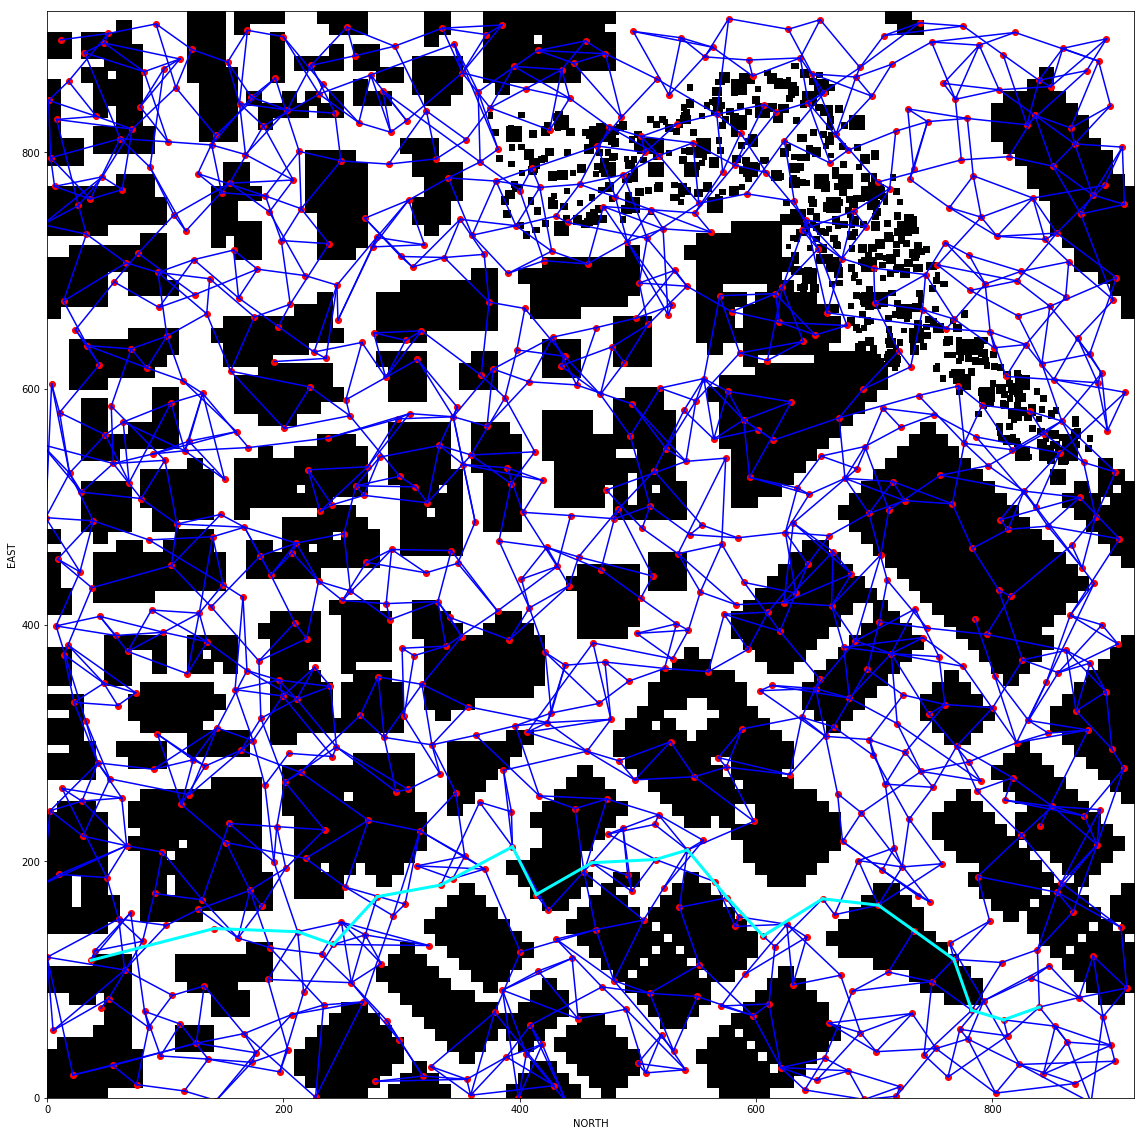

In [10]:
fig = plt.figure()

from planning_utils import create_grid
grid, _ = create_grid(data, 1, 1)
plt.imshow(grid, cmap='Greys', origin='lower')

# Add code to visualize path here
nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

# draw nodes
for n1 in prm._graph.nodes:
    plt.scatter(n1[1] - emin, n1[0] - nmin, c='red')
    
# draw edges
for (n1, n2) in prm._graph.edges:
    plt.plot([n1[1] - emin, n2[1] - emin], [n1[0] - nmin, n2[0] - nmin], 'blue')
    
# TODO: add code to visualize the path
path_pairs = zip(path[:-1], path[1:])
for (n1, n2) in path_pairs:
    plt.plot([n1[1] - emin, n2[1] - emin], 
             [n1[0] - nmin, n2[0] - nmin], 
             'cyan', linewidth=3)


plt.xlabel('NORTH')
plt.ylabel('EAST')
plt.axis([0, prm._grid.xrange, 0, prm._grid.yrange])

plt.show()